In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('../datasets/milk_price_market_survey.csv')
df.head()

X = df[['gram']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

mlr = LinearRegression()
mlr.fit(X_train, y_train) #model training

p_1 = mlr.coef_[0]
p_0 = mlr.intercept_
print('p(g) = %.2fg + %.2f'%(p_1,p_0))
print(y_train)


SyntaxError: invalid syntax (2403805308.py, line 9)

[ 300.  315.  330.  345.  360.  375.  390.  405.  420.  435.  450.  465.
  480.  495.  510.  525.  540.  555.  570.  585.  600.  615.  630.  645.
  660.  675.  690.  705.  720.  735.  750.  765.  780.  795.  810.  825.
  840.  855.  870.  885.  900.  915.  930.  945.  960.  975.  990. 1005.
 1020. 1035. 1050. 1065. 1080. 1095. 1110. 1125. 1140. 1155. 1170. 1185.
 1200. 1215. 1230. 1245. 1260. 1275. 1290. 1305. 1320. 1335. 1350. 1365.
 1380. 1395. 1410. 1425. 1440. 1455. 1470. 1485. 1500. 1515. 1530. 1545.
 1560. 1575. 1590. 1605. 1620. 1635. 1650. 1665. 1680. 1695. 1710. 1725.
 1740. 1755. 1770. 1785.]
[ 54.90984769  56.56976097  58.22967425  59.88958753  61.54950081
  63.20941409  64.86932737  66.52924065  68.18915394  69.84906722
  71.5089805   73.16889378  74.82880706  76.48872034  78.14863362
  79.80854691  81.46846019  83.12837347  84.78828675  86.44820003
  88.10811331  89.76802659  91.42793987  93.08785316  94.74776644
  96.40767972  98.067593    99.72750628 101.38741956 103.047

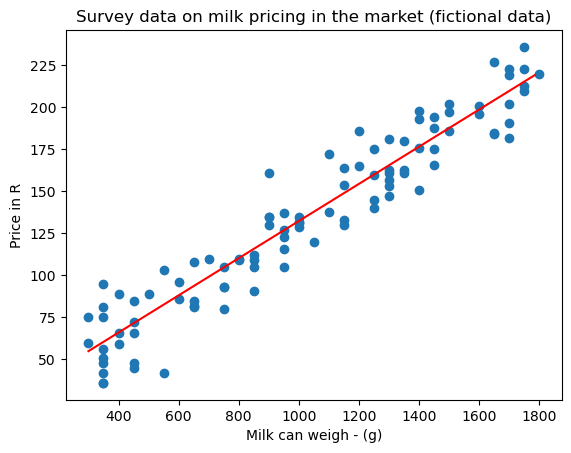

In [5]:
import matplotlib.pyplot as plt
import numpy as np

g_min = df['gram'].min()
g_max = df['gram'].max()

r_g = g_max - g_min
g_n = np.arange(g_min,g_max,step=r_g/100)
print(g_n)
y_regr_n = g_n*p_1 + p_0
print(y_regr_n)

plt.figure()
plt.scatter(df['gram'],df['price'])
plt.plot(g_n,y_regr_n, color='r')
plt.xlabel('Milk can weigh - (g)')
plt.ylabel('Price in R')
plt.title('Survey data on milk pricing in the market (fictional data)')
plt.show()

In [16]:
from sklearn.metrics import r2_score

y_pred_train = mlr.predict(X_train)
r2_score_train = r2_score(y_train, y_pred_train)

y_pred_test = mlr.predict(X_test)
r2_score_test = r2_score(y_test, y_pred_test)

print('r2_score-train: ', r2_score_train)
print('r2_score-test: ', r2_score_test)
print(len(y_pred_train))

r2_score-train:  0.9105743325791579
r2_score-test:  0.9191706611980854
80


9     181.0
51    163.0
29    109.0
88    185.0
75    110.0
      ...  
76    191.0
53     72.0
38    202.0
83     89.0
47    164.0
Name: price, Length: 80, dtype: float64


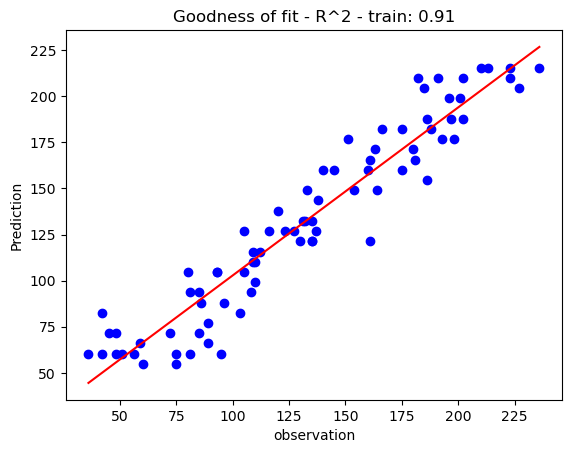

In [15]:
y_1 = y_train.iloc[:,0]
a,b = np.polyfit(y_1, y_pred_train,1)
yp_1 = [a*y_1.min() + b, a*y_1.max() + b]
print(y_1)

plt.figure()
plt.scatter(y_train,y_pred_train, color='blue')
plt.plot([y_1.min(), y_1.max()], yp_1, color='red')
plt.xlabel('observation')
plt.ylabel('Prediction')
plt.title('Goodness of fit - R^2 - train: %.2f'%(r2_score_train))
plt.show()

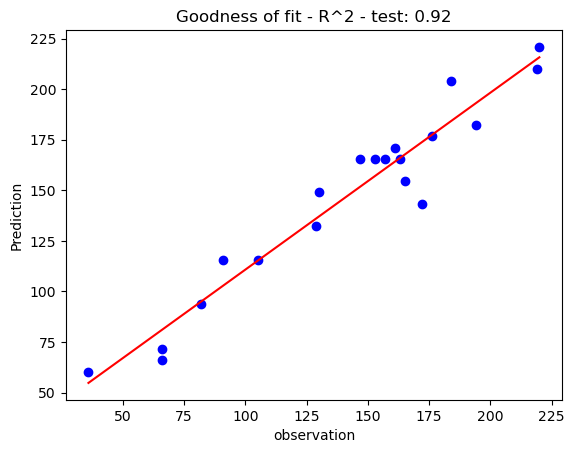

In [13]:
y_1 = y_test.iloc[:,0]
a,b = np.polyfit(y_1, y_pred_test,1)
yp_1 = [a*y_1.min() + b, a*y_1.max() + b]

plt.figure()
plt.scatter(y_test,y_pred_test, color='blue')
plt.plot([y_1.min(), y_1.max()], yp_1, color='red')
plt.xlabel('observation')
plt.ylabel('Prediction')
plt.title('Goodness of fit - R^2 - test: %.2f'%(r2_score_test))
plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')
feats = np.array([1500]).reshape(-1,1)
price = mlr.predict(feats)

print(f'A milk can of {feats[0][0]} will cost R{price[0][0]}')

A milk can of 1500 will cost R187.7029101912379
